In [1]:
import numpy as np
import pandas as pd
import joblib
import itertools
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_table = pd.read_csv("/root/git-repos/buckets/bkt_prd_dsv_brain_therapy_raw/Features/Focused_Attention/features_for_anova.csv")

In [3]:
data_table.head()

,Participant,Type,type_order,context,context_order,ecg_heart_rate_mean,ecg_hrv_std_mean,skin_temperature_mean,eda_mean_mean,eda_no_of_peaks_mean,...,ecg_hrv_std_sem,skin_temperature_sem,eda_mean_sem,eda_no_of_peaks_sem,eda_lf_sem,eda_hf_sem,eda_lf_hf_ratio_sem,Type_index,Difficulty,Perceptibility
0,1,2D,1,HH,2,63.946238,78.269483,12.963029,2.889028,7.50,...,7.649773,0.001430,0.148381,1.554563,0.000304,0.000204,0.350886,0,1,1
1,1,2D,1,HL,4,64.394956,74.537523,12.964289,3.246280,6.00,...,6.098350,0.001896,0.140140,0.408248,0.001134,0.000757,0.488771,0,1,0
2,1,2D,1,LH,3,65.819856,76.952992,12.966755,3.236491,3.75,...,6.826816,0.002469,0.569773,0.629153,0.015614,0.008526,0.499478,0,0,1
3,1,2D,1,LL,1,66.459021,93.879254,12.967418,4.081246,5.75,...,10.067802,0.000902,0.189681,1.030776,0.000417,0.000382,0.342255,0,0,0
4,1,3D,2,HH,2,65.206791,69.292745,12.956964,6.938360,4.25,...,8.420723,0.000022,0.123537,0.478714,0.001018,0.000644,0.077828,1,1,1


In [4]:
columns = data_table.columns[5:-3]

In [5]:
c =['Participant','Type_index','context_index','context_order']
cols = list(c) + list(columns.values)

In [6]:
data_table['Type_index'] = [2 if x == 1  else 1 for x in data_table['Type_index']] 

In [7]:
data_table['context_index'] = data_table['context'].apply(lambda x: 1 if x == 'HH' else 2 if x == 'HL' else 3 if x== 'LH' else 4)

In [8]:
data_table = data_table[cols]

In [9]:
contexts = ['HH','HL','LH','LL']
types = ['2D','VR']

In [10]:
context_combinations = list(itertools.combinations(contexts,2))*2
context_combinations

[('HH', 'HL'),
 ('HH', 'LH'),
 ('HH', 'LL'),
 ('HL', 'LH'),
 ('HL', 'LL'),
 ('LH', 'LL'),
 ('HH', 'HL'),
 ('HH', 'LH'),
 ('HH', 'LL'),
 ('HL', 'LH'),
 ('HL', 'LL'),
 ('LH', 'LL')]

In [11]:
data_table.tail(8)

,Participant,Type_index,context_index,context_order,ecg_heart_rate_mean,ecg_hrv_std_mean,skin_temperature_mean,eda_mean_mean,eda_no_of_peaks_mean,eda_lf_mean,eda_hf_mean,eda_lf_hf_ratio_mean,ecg_heart_rate_sem,ecg_hrv_std_sem,skin_temperature_sem,eda_mean_sem,eda_no_of_peaks_sem,eda_lf_sem,eda_hf_sem,eda_lf_hf_ratio_sem
152,21,1,1,4,63.847132,36.387555,22.883258,9.197047,14.50,0.000408,0.000239,1.731857,0.375950,4.657929,0.004681,0.061051,3.304038,0.000137,0.000084,0.071522
153,21,1,2,3,65.524620,42.044219,22.844868,8.962083,6.75,0.011900,0.007294,1.592460,0.666806,3.581141,0.003905,0.362586,2.428134,0.009975,0.006127,0.041511
154,21,1,3,2,67.106685,35.417248,22.824814,8.443891,11.25,0.003307,0.001802,1.670545,0.327639,2.223200,0.000015,0.078433,4.210602,0.001843,0.000972,0.130966
155,21,1,4,1,67.364644,38.709246,22.836723,8.578968,11.00,0.000360,0.000212,1.849844,0.522593,3.520764,0.005229,0.035812,3.027650,0.000160,0.000095,0.162961
156,21,2,1,3,65.979590,31.678756,22.492665,10.606708,16.75,0.000346,0.000215,1.557123,0.336431,2.687658,0.006001,0.095167,2.286737,0.000108,0.000066,0.062589
157,21,2,2,1,68.775497,33.464873,22.440844,11.823413,9.75,0.000868,0.000485,1.650963,0.519839,2.614206,0.005783,0.096076,2.868652,0.000421,0.000225,0.127890
158,21,2,3,2,70.182017,31.506515,22.440983,11.152752,16.25,0.000359,0.000226,1.474018,0.436574,3.531752,0.004768,0.128182,1.796988,0.000121,0.000072,0.130514
159,21,2,4,4,80.135948,32.785691,22.577610,10.520215,10.75,0.002616,0.001466,1.559770,1.285151,1.853097,0.006133,0.088187,2.096624,0.002535,0.001410,0.101103


In [12]:
def compute_lme(data):
    features = data.columns[4:]
    for feature in features:
        model = smf.mixedlm("{} ~ context_order + context_index + Type_index + context_index*Type_index".format(feature),
                         data, groups = data["Participant"])
        mdf = model.fit()
        print(mdf.summary())
        break
    

In [13]:
features = data_table.columns[4:]

In [14]:
features

Index(['ecg_heart_rate_mean', 'ecg_hrv_std_mean', 'skin_temperature_mean',
       'eda_mean_mean', 'eda_no_of_peaks_mean', 'eda_lf_mean', 'eda_hf_mean',
       'eda_lf_hf_ratio_mean', 'ecg_heart_rate_sem', 'ecg_hrv_std_sem',
       'skin_temperature_sem', 'eda_mean_sem', 'eda_no_of_peaks_sem',
       'eda_lf_sem', 'eda_hf_sem', 'eda_lf_hf_ratio_sem'],
      dtype='object')

In [15]:
def generate_ydf(feature,c_coefficient):
    diff_diff_df = pd.DataFrame([])
    context_values = ['HH','HL','LH','LL']
    context_combinations = list(itertools.combinations(context_values,2))
    types = [1,2]
    context_dict = {"HH":1,"HL":2,"LH":3,"LL":4}
    for c in context_combinations:
        contexts = [context_dict[key] for key in c]
#         display(list(contexts), list(types))
        combinations = list(itertools.product(types,contexts))
        y = (np.prod(combinations[0])*c_coefficient) - (np.prod(combinations[1])*c_coefficient) - (np.prod(combinations[2])*c_coefficient) + (np.prod(combinations[3])*c_coefficient)
        df = pd.DataFrame([[feature,c[0],c[1],y]], columns= ['feature','context_a','context_b','diff_diff'])
        diff_diff_df = pd.concat([diff_diff_df,df])
    return diff_diff_df
#         break
        
        
    
    

In [16]:
coefficients_df = pd.DataFrame([])
diff_diff_df = pd.DataFrame([])
for feature in features:
    d = data_table[['Participant','context_index','Type_index','context_order',feature]].dropna()
    md = smf.mixedlm("{} ~ context_order + context_index + Type_index + (context_index*Type_index) ".format(feature),
                         d, groups = d["Participant"])
    mdf = md.fit()
    interaction = mdf.params['context_index:Type_index']
    p_value = mdf.pvalues['context_index:Type_index']
    df = pd.DataFrame({"Feature":[feature],
                       "context_index*Type_index":[interaction],
                       "p_value":[p_value]
                      })
    coefficients_df = pd.concat([coefficients_df,df])
    
    #----------------------------
    diff = generate_ydf(feature, interaction)
    diff_diff_df = pd.concat([diff_diff_df,diff])
    
#     break
    

/opt/anaconda/anaconda3/envs/btsrd/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/opt/anaconda/anaconda3/envs/btsrd/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/opt/anaconda/anaconda3/envs/btsrd/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda/anaconda3/envs/btsrd/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
/opt/anaconda/anaconda3/envs/btsrd/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Ma

In [17]:
coefficients_df

,Feature,context_index*Type_index,p_value
0,ecg_heart_rate_mean,-0.337787,0.748908
0,ecg_hrv_std_mean,-10.923581,0.883286
0,skin_temperature_mean,-0.004484,0.970790
0,eda_mean_mean,-0.020077,0.940040
0,eda_no_of_peaks_mean,-0.299322,0.529072
0,eda_lf_mean,-0.003689,0.006104
0,eda_hf_mean,-0.001748,0.012425
0,eda_lf_hf_ratio_mean,0.036763,0.639148
0,ecg_heart_rate_sem,0.443773,0.582598
0,ecg_hrv_std_sem,7.430095,0.219146


In [18]:
diff_diff_df.head()

,feature,context_a,context_b,diff_diff
0,ecg_heart_rate_mean,HH,HL,-0.337787
0,ecg_heart_rate_mean,HH,LH,-0.675574
0,ecg_heart_rate_mean,HH,LL,-1.013361
0,ecg_heart_rate_mean,HL,LH,-0.337787
0,ecg_heart_rate_mean,HL,LL,-0.675574


In [19]:
features = sorted(diff_diff_df['feature'].unique())

In [20]:
sns.set_style("darkgrid",{"axes.facecolor":".9"})
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

/opt/anaconda/anaconda3/envs/btsrd/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


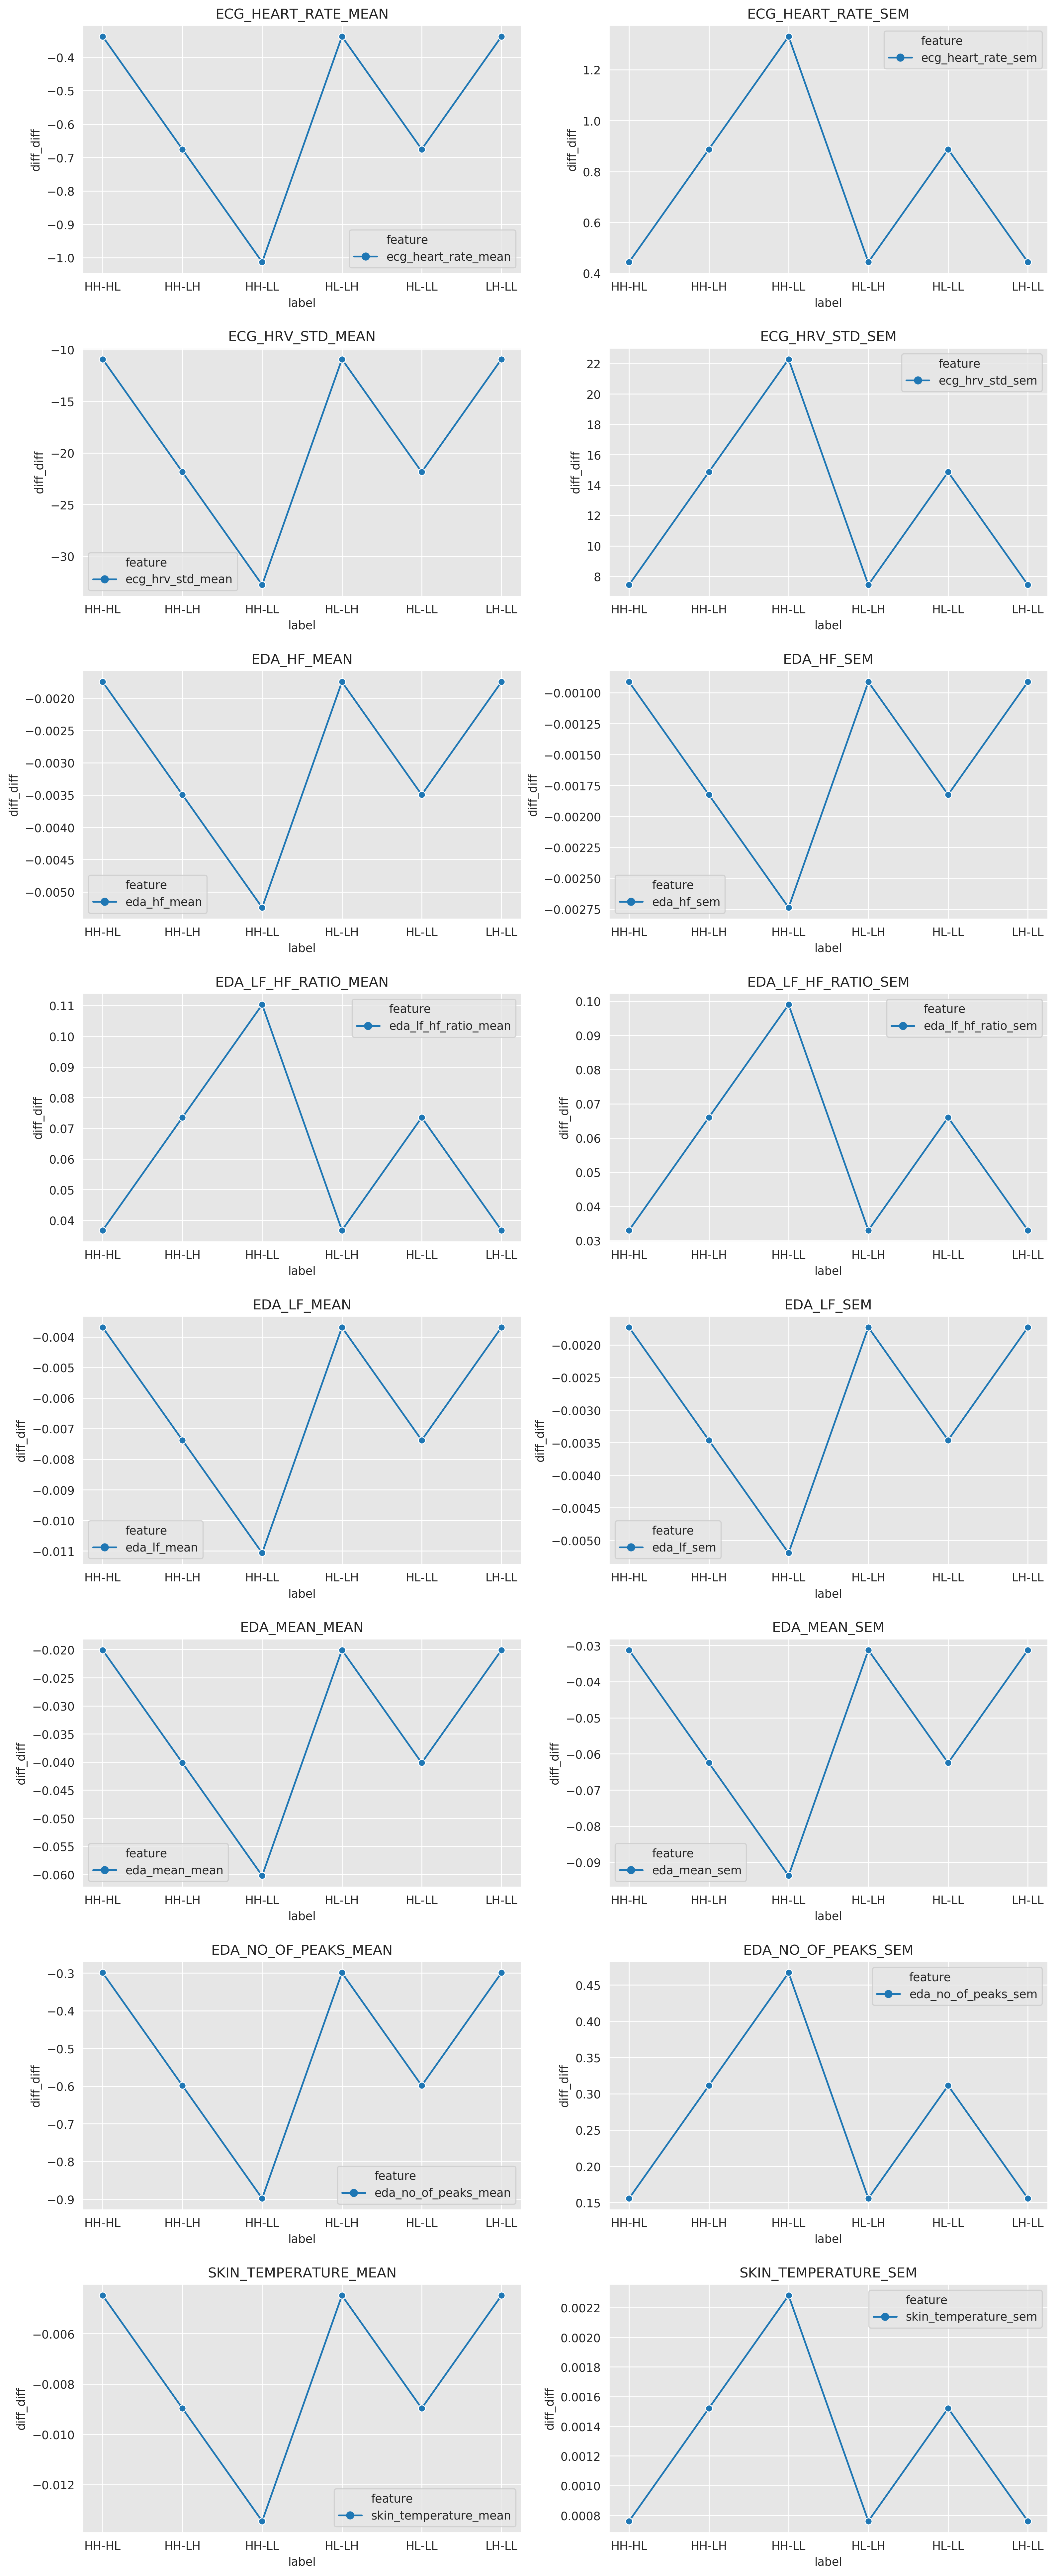

In [21]:
fig, axes = plt.subplots(8,2, figsize = (15,40), dpi = 250)
ax = axes.flatten()
for i, feature in enumerate(features):
    data = diff_diff_df[diff_diff_df['feature']==feature]
    data['label'] = data['context_a']+ "-"+data['context_b']
    sns.lineplot(x = "label",y = "diff_diff", hue = "feature", style = "feature", markers = True, data = data, ax = ax[i],
                )
    ax[i].set_title("{}".format(feature.upper()))
plt.subplots_adjust(hspace = 0.3)
    

### MODEL 2

In [22]:
data_table_m2 = data_table.copy()
data_table_m2['context_index'] = data_table_m2['context_index'].apply(lambda x : 1 if x == 5 else 2 if x == 6 else 3 if x == 7 else 4 if x == 8 else x)

In [23]:
coeffic_df_m2 = pd.DataFrame([])
diff_diff_df_m2 = pd.DataFrame([])
for feature in features:
    d = data_table_m2[['Participant','context_index','Type_index','context_order',feature]].dropna()
    md = smf.mixedlm("{} ~ context_order + context_index + Type_index + (context_index*Type_index) ".format(feature),
                         d, groups = d["Participant"])
    mdf = md.fit()
    interaction = mdf.params['context_index:Type_index']
    p_value = mdf.pvalues['context_index:Type_index']
    df = pd.DataFrame({"Feature":[feature],
                       "context_index*Type_index":[interaction],
                       "p_value":[p_value]
                      })
    coeffic_df_m2 = pd.concat([coefficients_df,df])
    
    #----------------------------
    diff = generate_ydf(feature, interaction)
    diff_diff_df_m2 = pd.concat([diff_diff_df,diff])
    
#     break
    

/opt/anaconda/anaconda3/envs/btsrd/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda/anaconda3/envs/btsrd/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
/opt/anaconda/anaconda3/envs/btsrd/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda/anaconda3/envs/btsrd/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with cg
  ConvergenceWarning)
/opt/anaconda/anaconda3/envs/btsrd/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to

In [24]:
coeffic_df_m2.head(20)

,Feature,context_index*Type_index,p_value
0,ecg_heart_rate_mean,-0.337787,0.748908
0,ecg_hrv_std_mean,-10.923581,0.883286
0,skin_temperature_mean,-0.004484,0.970790
0,eda_mean_mean,-0.020077,0.940040
0,eda_no_of_peaks_mean,-0.299322,0.529072
0,eda_lf_mean,-0.003689,0.006104
0,eda_hf_mean,-0.001748,0.012425
0,eda_lf_hf_ratio_mean,0.036763,0.639148
0,ecg_heart_rate_sem,0.443773,0.582598
0,ecg_hrv_std_sem,7.430095,0.219146


In [25]:
diff_diff_df_m2.head(20)

,feature,context_a,context_b,diff_diff
0,ecg_heart_rate_mean,HH,HL,-0.337787
0,ecg_heart_rate_mean,HH,LH,-0.675574
0,ecg_heart_rate_mean,HH,LL,-1.013361
0,ecg_heart_rate_mean,HL,LH,-0.337787
0,ecg_heart_rate_mean,HL,LL,-0.675574
0,ecg_heart_rate_mean,LH,LL,-0.337787
0,ecg_hrv_std_mean,HH,HL,-10.923581
0,ecg_hrv_std_mean,HH,LH,-21.847163
0,ecg_hrv_std_mean,HH,LL,-32.770744
0,ecg_hrv_std_mean,HL,LH,-10.923581


/opt/anaconda/anaconda3/envs/btsrd/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


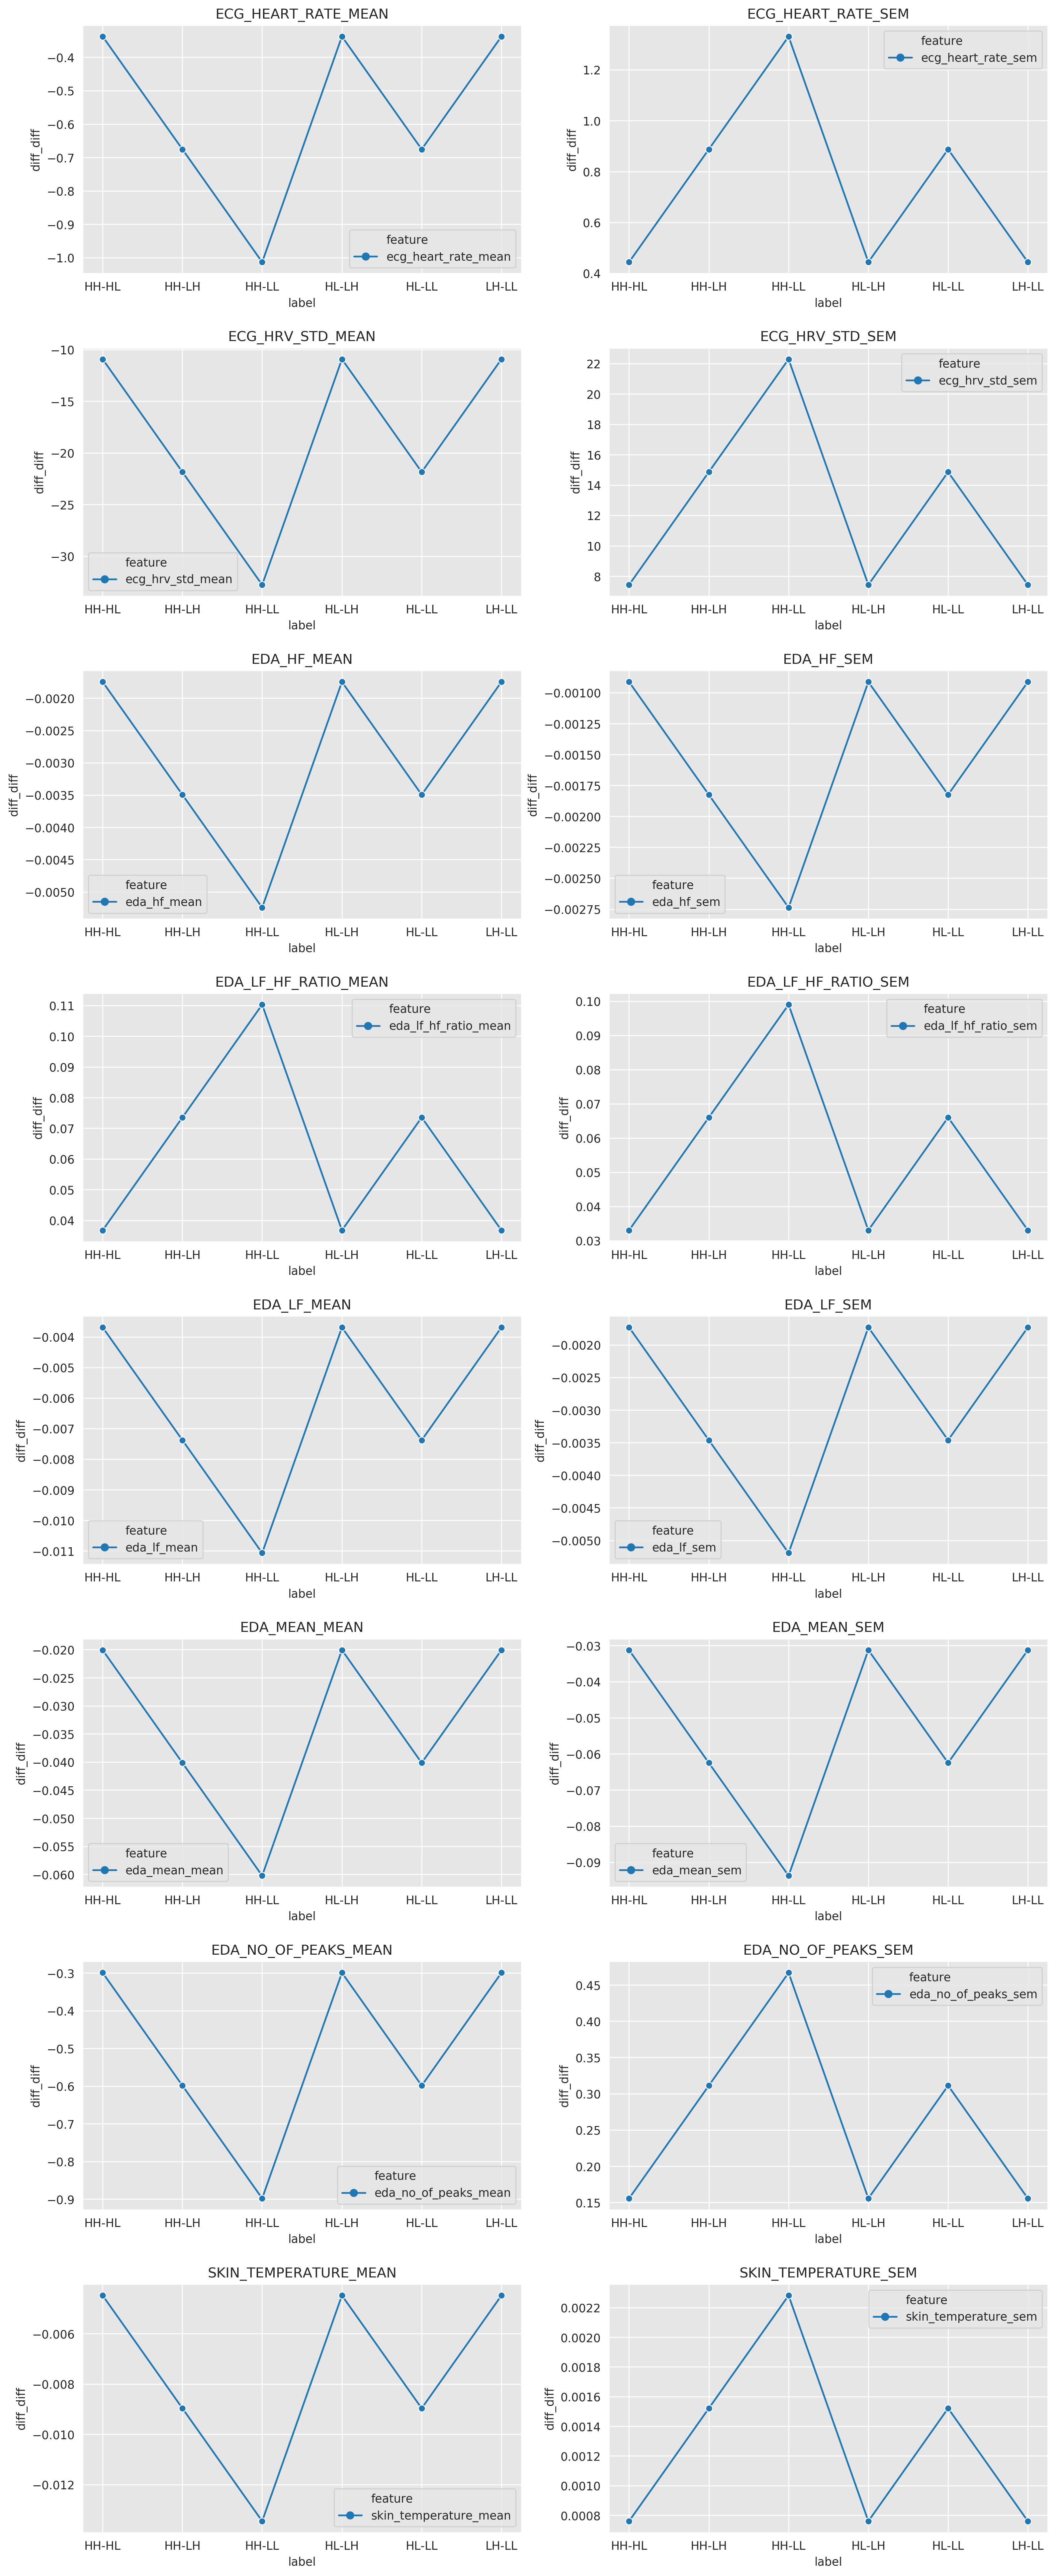

In [26]:
fig, axes = plt.subplots(8,2, figsize = (15,40), dpi = 250)
ax = axes.flatten()
diff_diff_df_m2.reset_index(inplace = True)
for i, feature in enumerate(features):
    data = diff_diff_df_m2[diff_diff_df_m2['feature']==feature]
    data['label'] = data['context_a']+ "-"+data['context_b']
    sns.lineplot(x = "label",y = "diff_diff", hue = "feature", style = "feature", markers = True, data = data, ax = ax[i],
                )
    ax[i].set_title("{}".format(feature.upper()))
plt.subplots_adjust(hspace = 0.3)
    

### Model 3

In [27]:

md = smf.mixedlm("ecg_heart_rate_mean ~ context_order + context_index + Type_index + context_index*Type_index ",
                         data_table, groups = data_table["Participant"])
mdf = md.fit()
print(mdf.summary())

               Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  ecg_heart_rate_mean
No. Observations:  160      Method:              REML               
No. Groups:        20       Scale:               55.6796            
Min. group size:   8        Likelihood:          -570.9943          
Max. group size:   8        Converged:           Yes                
Mean group size:   8.0                                              
--------------------------------------------------------------------
                          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------
Intercept                 67.047    5.355 12.520 0.000 56.551 77.543
context_order              0.151    0.529  0.286 0.775 -0.886  1.189
context_index              1.050    1.669  0.629 0.529 -2.220  4.321
Type_index                -0.385    2.890 -0.133 0.894 -6.050  5.279
context_index:Type_index  -0.338    1.055 -0.320 0

In [28]:
mdf.pvalues

Intercept                   5.806469e-36
context_order               7.747461e-01
context_index               5.290778e-01
Type_index                  8.938881e-01
context_index:Type_index    7.489080e-01
Group Var                   6.251543e-03
dtype: float64

In [29]:
mdf.params['context_index:Type_index']

-0.3377869176569159